# Characterization of airlines based on delay time

## Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data from file

In [2]:
flights = pd.read_csv("flights.txt", sep="|")

In [3]:
flights.shape

(1191805, 31)

In [4]:
flights['FLIGHTDATE'] = pd.to_datetime(flights['FLIGHTDATE'], format='%Y%m%d')

In [5]:
flights.dtypes

TRANSACTIONID                 int64
FLIGHTDATE           datetime64[ns]
AIRLINECODE                  object
AIRLINENAME                  object
TAILNUM                      object
FLIGHTNUM                     int64
ORIGINAIRPORTCODE            object
ORIGAIRPORTNAME              object
ORIGINCITYNAME               object
ORIGINSTATE                  object
ORIGINSTATENAME              object
DESTAIRPORTCODE              object
DESTAIRPORTNAME              object
DESTCITYNAME                 object
DESTSTATE                    object
DESTSTATENAME                object
CRSDEPTIME                    int64
DEPTIME                     float64
DEPDELAY                    float64
TAXIOUT                     float64
WHEELSOFF                   float64
WHEELSON                    float64
TAXIIN                      float64
CRSARRTIME                    int64
ARRTIME                     float64
ARRDELAY                    float64
CRSELAPSEDTIME              float64
ACTUALELAPSEDTIME           

In [6]:
flights.iloc[:,:16].head()

,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,AIRLINENAME,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,DESTAIRPORTCODE,DESTAIRPORTNAME,DESTCITYNAME,DESTSTATE,DESTSTATENAME
0,54548800,2002-01-01,WN,Southwest Airlines Co.: WN,N103@@,1425,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,DAL,DallasTX: Dallas Love Field,Dallas,TX,Texas
1,55872300,2002-01-01,CO,Continental Air Lines Inc.: CO,N83872,150,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,HoustonTX: George Bush Intercontinental/Houston,Houston,TX,Texas
2,54388800,2002-01-01,WN,Southwest Airlines Co.: WN,N334@@,249,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,MCI,Kansas CityMO: Kansas City International,Kansas City,MO,Missouri
3,54486500,2002-01-01,WN,Southwest Airlines Co.: WN,N699@@,902,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAS,Las VegasNV: McCarran International,Las Vegas,NV,Nevada
4,55878700,2002-01-03,CO,Continental Air Lines Inc.: CO,N58606,234,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,HoustonTX: George Bush Intercontinental/Houston,Houston,TX,Texas


In [7]:
flights.iloc[:,16:].head()

,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE
0,1425,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655,1652.0,-3.0,90.0,87.0,F,False,580 miles
1,1130,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426,1435.0,9.0,116.0,119.0,False,F,744 miles
2,1215,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500,1620.0,80.0,105.0,102.0,F,False,718 miles
3,1925,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950,1948.0,-2.0,85.0,83.0,0,0,487 miles
4,1455,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750,1747.0,-3.0,115.0,114.0,F,False,744 miles


In [8]:
flights.columns

Index(['TRANSACTIONID', 'FLIGHTDATE', 'AIRLINECODE', 'AIRLINENAME', 'TAILNUM',
       'FLIGHTNUM', 'ORIGINAIRPORTCODE', 'ORIGAIRPORTNAME', 'ORIGINCITYNAME',
       'ORIGINSTATE', 'ORIGINSTATENAME', 'DESTAIRPORTCODE', 'DESTAIRPORTNAME',
       'DESTCITYNAME', 'DESTSTATE', 'DESTSTATENAME', 'CRSDEPTIME', 'DEPTIME',
       'DEPDELAY', 'TAXIOUT', 'WHEELSOFF', 'WHEELSON', 'TAXIIN', 'CRSARRTIME',
       'ARRTIME', 'ARRDELAY', 'CRSELAPSEDTIME', 'ACTUALELAPSEDTIME',
       'CANCELLED', 'DIVERTED', 'DISTANCE'],
      dtype='object')

## Manipulating and organizing data

In [9]:
flights['TOTALDELAY'] = flights['DEPDELAY'] + flights['ARRDELAY']

In [10]:
flights['DISTANCEMILES'] = pd.DataFrame(flights['DISTANCE'].str.split().tolist())[0].astype('float64')

In [11]:
flights['CANCELLED'] = flights['CANCELLED'].str.replace("False","0").str.replace("F","0").str.replace("True","1").replace("T","1").astype("int64")

In [12]:
columns = ['AIRLINENAME','TOTALDELAY','TAXIOUT','TAXIIN','ACTUALELAPSEDTIME','DISTANCEMILES','CANCELLED']

In [13]:
flights_X = flights.loc[:,columns]

In [14]:
flights_X.dtypes

AIRLINENAME           object
TOTALDELAY           float64
TAXIOUT              float64
TAXIIN               float64
ACTUALELAPSEDTIME    float64
DISTANCEMILES        float64
CANCELLED              int64
dtype: object

In [15]:
flights_cancelled = pd.DataFrame(flights_X.groupby("CANCELLED")['AIRLINENAME'].value_counts()[1])

In [16]:
flights_cancelled = flights_cancelled.rename(columns={'AIRLINENAME':'CANCELLED'}).reset_index()

In [17]:
flights_cancelled.head()

,AIRLINENAME,CANCELLED
0,American Airlines Inc.: AA,3624
1,US Airways Inc.: US (Merged with America West ...,3399
2,United Air Lines Inc.: UA,3316
3,Delta Air Lines Inc.: DL,3303
4,Northwest Airlines Inc.: NW,2795


In [18]:
flights_airlines = flights_X.groupby('AIRLINENAME').agg({'TOTALDELAY':np.mean,'TAXIOUT':np.mean,'TAXIIN':np.mean,'ACTUALELAPSEDTIME':np.mean,'DISTANCEMILES':np.sum})

In [19]:
flights_airlines.reset_index(inplace=True)

In [20]:
flights_airlines = flights_airlines.merge(flights_cancelled, on="AIRLINENAME", how="left")

In [21]:
flights_airlines.head()

,AIRLINENAME,TOTALDELAY,TAXIOUT,TAXIIN,ACTUALELAPSEDTIME,DISTANCEMILES,CANCELLED
0,ATA Airlines d/b/a ATA: TZ,8.926534,17.695652,7.359486,173.425820,1592613.0,17
1,AirTran Airways Corporation: FL,7.135774,14.997573,7.523575,122.362740,10537169.0,175
2,Alaska Airlines Inc.: AS,7.083628,13.283854,5.182460,140.234049,26461827.0,646
3,Aloha Airlines Inc.: AQ,2.056818,7.001623,3.754870,48.779221,147155.0,29
4,America West Airlines Inc.: HP (Merged with US...,15.274335,14.425029,6.009991,130.772243,20923236.0,550


In [22]:
flights_airlines.shape

(26, 7)

## Input data

In [23]:
X = flights_airlines.iloc[:,1:]

In [24]:
X.head()

,TOTALDELAY,TAXIOUT,TAXIIN,ACTUALELAPSEDTIME,DISTANCEMILES,CANCELLED
0,8.926534,17.695652,7.359486,173.425820,1592613.0,17
1,7.135774,14.997573,7.523575,122.362740,10537169.0,175
2,7.083628,13.283854,5.182460,140.234049,26461827.0,646
3,2.056818,7.001623,3.754870,48.779221,147155.0,29
4,15.274335,14.425029,6.009991,130.772243,20923236.0,550


In [25]:
sc = StandardScaler()

In [26]:
sc.fit(X)

StandardScaler()

In [27]:
X_norm = sc.transform(X)

In [28]:
X_norm.shape

(26, 6)

### K-Means

In [29]:
clusters = np.arange(1,11)
clusters

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [30]:
inertia = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inertia.append(kmeans.inertia_)

In [31]:
eva = pd.DataFrame({"K": clusters, "Inertia": inertia})
eva

,K,Inertia
0,1,156.000000
1,2,112.978867
2,3,82.707120
3,4,65.414638
4,5,49.680261
5,6,42.776412
6,7,36.899801
7,8,29.826952
8,9,24.961689
9,10,21.219137


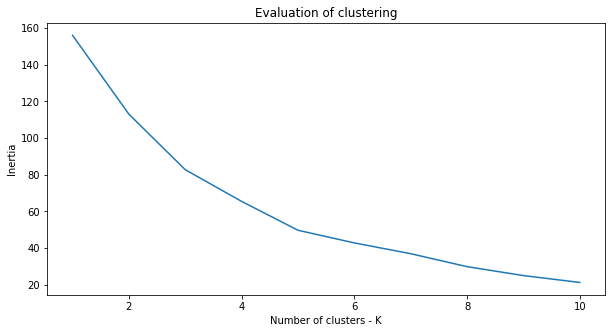

In [32]:
fig,ax = plt.subplots(figsize=(10,5))
_=sns.lineplot(data=eva, x="K", y="Inertia")
_=ax.set_xlabel("Number of clusters - K")
_=ax.set_title("Evaluation of clustering")

In [33]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [34]:
kmeans.fit(X_norm)

KMeans(n_clusters=5, random_state=0)

In [35]:
kmeans.cluster_centers_

array([[ 0.02355025,  0.11486577, -0.21005306, -0.48207037, -0.44904674,
        -0.31757355],
       [-0.04612832,  0.00795901, -0.24642563,  0.19194845,  1.63776092,
         1.6533324 ],
       [ 0.10702096,  0.37603232,  0.11551318,  1.35171059, -0.38868668,
        -0.62572946],
       [ 1.79567945,  0.80732775,  2.69890384,  0.17486944, -0.7262431 ,
        -0.78465739],
       [-2.05437325, -2.40304731, -1.09311809, -1.4786042 , -0.74556591,
        -0.86436167]])

In [36]:
flights_airlines['CLUSTER'] = kmeans.labels_

In [37]:
flights_airlines.head()

,AIRLINENAME,TOTALDELAY,TAXIOUT,TAXIIN,ACTUALELAPSEDTIME,DISTANCEMILES,CANCELLED,CLUSTER
0,ATA Airlines d/b/a ATA: TZ,8.926534,17.695652,7.359486,173.425820,1592613.0,17,2
1,AirTran Airways Corporation: FL,7.135774,14.997573,7.523575,122.362740,10537169.0,175,0
2,Alaska Airlines Inc.: AS,7.083628,13.283854,5.182460,140.234049,26461827.0,646,0
3,Aloha Airlines Inc.: AQ,2.056818,7.001623,3.754870,48.779221,147155.0,29,4
4,America West Airlines Inc.: HP (Merged with US...,15.274335,14.425029,6.009991,130.772243,20923236.0,550,0


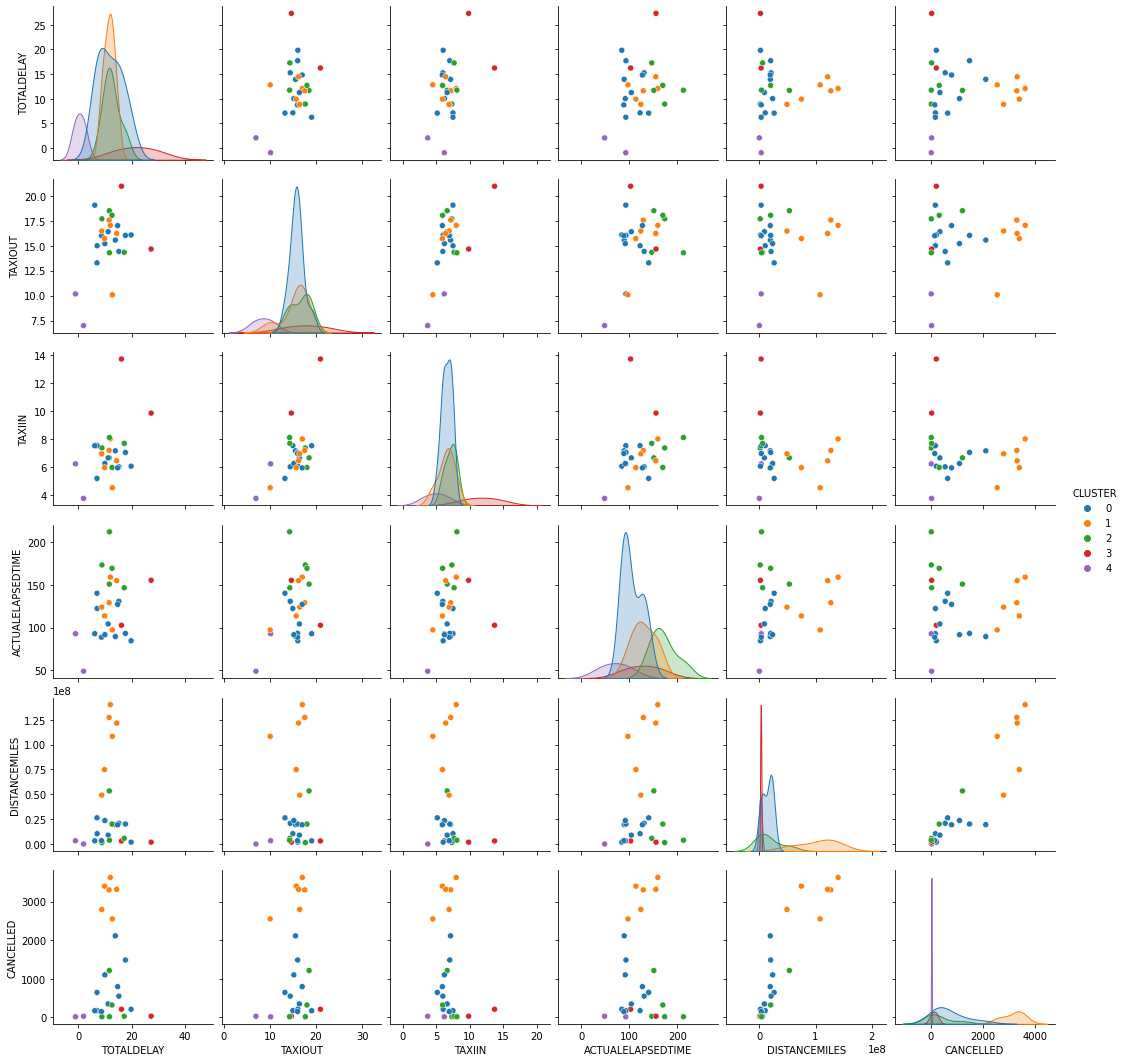

In [38]:
_=sns.pairplot(flights_airlines, hue='CLUSTER', palette="tab10")